<a href="https://colab.research.google.com/github/drovosekovanton/Skillfactory_game/blob/master/Skillfactory_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка

### Импорт используемых библиотек

In [1]:
import pandas as pd
import numpy as np
from pathlib import PurePath
from collections import namedtuple
from google.colab import drive
import os
from datetime import datetime, timedelta
import progressbar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')


# mount root of your google drive to '/content/drive'
drive.mount('/content/drive')
# suppose that dataset is inside 
# 'Colab Notebooks/Skillfactory_game_data' folder
file_prefix = PurePath('/content/drive/My Drive/'
                        'Colab Notebooks/Skillfactory_game_data')

# some plot stuff
%matplotlib inline
sns.set()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### `Описание файлов датасета`

**informations_households.csv**

Информация о датчиках энергопотребления и краткие сведения о домах, в которых эти датчики установлены. Столбцы датафрейма:

| LCLid | stdorToU | Acorn | Acorn_grouped | file |
|:-|:-|:-|:-|:-|
| id датчика | форма оплаты за электроэнергию в доме, в котором установлен датчик (Std – стандартная, ToU – Time of Use, оплата зависит от времени суток) | информация о том, к какой категории потребителей по системе ACORN относится семья, проживающая в данном доме |  | имя файла, содержащего показатели счётчиков |


**halfhourly_dataset\block_{0 - 111}.csv**

Архив содержит 112 файлов, содержащих данные об энергопотреблении, получаемые с каждого счётчика 1 раз в 30 минут. Каждый файл содержит информацию с датчиков, установленных в одном доме. Столбцы датафрейма:

| LCLid | tstp | energy(kWh/hh) |
|:-|:-|:-|
| id датчика | дата и время фиксации показателей | уровень энергопотребления |

**hourly_dataset\block_{0 - 111}.csv**

Архив содержит 112 файлов, содержащих данные об энергопотреблении, получаемые с каждого счётчика 1 раз в час. Каждый файл содержит информацию с датчиков, установленных в одном доме. Столбцы датафрейма:

| LCLid | tstp | energy |
|:-|:-|:-|
| id датчика | дата и время фиксации показателей | уровень энергопотребления |

**daily_dataset\daily_dataset\block_{0 - 111}.csv**

Архив содержит 112 файлов, содержащих обобщённые данные об энергопотреблении за каждые сутки. Каждый файл содержит информацию с датчиков, установленных в одном доме. Столбцы датафрейма:

| LCLid | day | energy_median | energy_mean | energy_max |energy_count|energy_std|energy_sum|energy_min|
|:-|:-|:-|:-|:-|:-|:-|:-|:-|
|id датчика|дата|медиана суточных показателей|среднее арифметическое суточных показателей|максимальное значение энергопотребления, зафиксированное датчиком в течение дня|количество показателей, зафиксированных датчиком в течение дня|стандартное отклонение|сумма значений всех показателей|минимальное значение энергопотребления, зафиксированное датчиком в течение дня|

**acorn_details.csv**

Данные о группах потребителей согласно классификации ACORN. При характеристике групп в данном датафрейме используется сравнение каждой группы с общенациональными показателями. Так, если значение ячейки по какому-либо показателю составляет 150 это означает, что в рассматриваемой группе этот показатель встречается в 1,5 раза чаще, чем в целом по стране. Столбцы датафрейма:
- MAIN CATEGORIES, CATEGORIES, REFERENCE – показатели, по которым осуществляется сравнение групп;
- ACORN-A, ACORN-B, ACORN-C, ACORN-D, ACORN-E, ACORN-F, ACORN-G, ACORN-H, ACORN-I, ACORN-J, ACORN-K, ACORN-L, ACORN-M, ACORN-N, ACORN-O, ACORN-P, ACORN-Q – частота встречаемости каждого из рассмотренных признаков в каждой группе.
Использование данного файла при проведении анализа не является обязательным

**weather_daily_darksky.csv**

Обобщённые данные о погоде за день. Столбцы датафрейма:
- temperatureMax – максимальное значение температуры воздуха;
- temperatureMaxTime – время, когда была зафиксирована максимальная температура воздуха;
- windBearing – направление ветра (по азимуту);
- icon – стандартизованное словесное описание погодных условий;
- dewPoint – точка росы;
- temperatureMinTime – время, когда была зафиксирована минимальная температура воздуха;
- cloudCover – облачность;
- windSpeed – скорость ветра;
- pressure – атмосферное давление;
- apparentTemperatureMinTime – время, когда была зафиксирована минимальная температура комфорта;
- apparentTemperatureHigh – дневная температура комфорта;
- precipType – тип осадков;
- visibility – видимость (в милях);
- humidity – относительная влажность;
- apparentTemperatureHighTime – время, когда была зафиксирована дневная температура комфорта;
- apparentTemperatureLow – ночная температура комфорта;
- apparentTemperatureMax – максимальная температура комфорта;
- uvIndex – UV-индекс;
- time – время начала сбора данных;
- sunsetTime – время заката;
- temperatureLow – минимальная ночная температура;
- temperatureMin – минимальная температура за сутки;
- temperatureHigh – максимальная дневная температура;
- sunriseTime – время восхода;
- temperatureHighTime – время, когда была зафиксирована максимальная дневная температура;
- uvIndexTime – время, когда был зафиксирован максимальный UV-индекс;
- summary – словесное описание погоды в течение дня (не рекомендуется использовать для автоматизированного анализа!);
- temperatureLowTime – время, когда была зафиксирована минимальная ночная температура;
- apparentTemperatureMin – минимальная температура комфорта;
- apparentTemperatureMaxTime – время, когда была зафиксирована максимальная температура комфорта за сутки;
- apparentTemperatureLowTime – время, когда была зафиксирована минимальная ночная температура комфорта; 
- moonPhase – фаза луны.

**weather_hourly_darksky.csv**

Почасовые сведения о погоде. Столбцы датафрейма:
- visibility – видимость в милях;
- windBearing – направление ветра (по азимуту);
- temperature – температура воздуха;
- time – время записи показателей;
- dewPoint – точка росы;
- pressure – атмосферное давление;
- apparentTemperature – температура комфорта;
- windSpeed – скорость ветра;
- precipType – тип осадков;
- icon – стандартизованное словесное описание погодных условий;
- humidity – относительная влажность;
- summary – нестандартизованное словесное описание погодных условий.

### Загрузка сводных данных

In [0]:
informations_households = pd.read_csv(
    file_prefix / 'informations_households.csv',
    )
daily_dataset = pd.read_csv(
    file_prefix / 'daily_dataset' / 'daily_dataset.csv.zip',
    parse_dates=['day'],
    infer_datetime_format=True,
    na_values='Null',
    dtype={'energy_median': np.double,
           'energy_mean': np.double,
           'energy_max': np.double,
           'energy_count': np.int8,
           'energy_std': np.double,
           'energy_sum': np.double,
           'energy_min': np.double
           }
    )
acorn_details = pd.read_csv(
    file_prefix / 'acorn_details.csv',
    encoding='cp1251'
    )
weather_daily_darksky = pd.read_csv(
    file_prefix / 'weather_daily_darksky.csv',
    parse_dates=['temperatureMaxTime',
                 'temperatureMinTime',
                 'apparentTemperatureMinTime',
                 'apparentTemperatureHighTime',
                 'time', # <- purified date of this row
                 'sunsetTime',
                 'sunriseTime',
                 'uvIndexTime',
                 'temperatureHighTime',
                 'temperatureLowTime',
                 'apparentTemperatureMaxTime',
                 'apparentTemperatureLowTime']
    )
weather_hourly_darksky = pd.read_csv(
    file_prefix / 'weather_hourly_darksky.csv',
    parse_dates=['time'] # <- purified date and time of this row
    )
uk_holidays = pd.read_csv(
    file_prefix /'uk_bank_holidays.csv',
    parse_dates=['Bank holidays']
    )

### группы по ACORN среди потребителей в датасете

In [0]:
# группы потребителей по ACORN

display(informations_households['Acorn_grouped'].unique())
# Присутствует 'ACORN-U(nclassified)' который не принадлежит ни одной ACORN-метрике,
# возможно, нам придётся его дропать при обработке по группам ACORN
# Также присутствует 'ACORN-' - скорее всего, битые данные, надо их отбросить
# Affluent - обеспеченный класс 
# Comfortable - средний класс
# Adversity - низший класс
display(informations_households.groupby(['Acorn', 'Acorn_grouped'])['file'].count())
display(informations_households = informations_households[informations_households['Acorn'] != 'ACORN-'])

array(['ACORN-', 'Affluent', 'Comfortable', 'Adversity', 'ACORN-U'],
      dtype=object)

Acorn    Acorn_grouped
ACORN-   ACORN-              2
ACORN-A  Affluent          157
ACORN-B  Affluent           25
ACORN-C  Affluent          151
ACORN-D  Affluent          292
ACORN-E  Affluent         1567
ACORN-F  Comfortable       684
ACORN-G  Comfortable       205
ACORN-H  Comfortable       455
ACORN-I  Comfortable        51
ACORN-J  Comfortable       112
ACORN-K  Adversity         165
ACORN-L  Adversity         342
ACORN-M  Adversity         113
ACORN-N  Adversity         152
ACORN-O  Adversity         103
ACORN-P  Adversity         110
ACORN-Q  Adversity         831
ACORN-U  ACORN-U            49
Name: file, dtype: int64

## Общие функции работы с данными

### Функция для получения данных по ACORN

In [3]:
# странная функция
def get_acorn_info(acorn_group, ref):
    return acorn_details[acorn_details['CATEGORIES'] == ref]\
    .sort_values(by=acorn_group, ascending=False)\
    .head(1)['REFERENCE']\
    .iloc[0]

get_acorn_info('ACORN-A', 'Age')

'Aged 65-74'

### Запрос почасовой информации в зависимости от списка LCLids

Мы можем формировать список LCLids на основе каких-то отборочных условий (тип тарификации, группа ACORN), отдавать его в функцию и принимать почасовое потребление этой конкретной группы потребителей.

```
retrieve_LCLids_hourly_consumption(LCLids)

Параметр LCLids:
перечислимый тип, состоящий из LCLid, предложенных к отбору

Возвращаемый результат:
DataFrame с колонками tstp (градация - час) и energy (кВт\*ч/ч\*ч)

Использует в работе:
hourly_dataset/block_xxx.csv.zip
```



In [0]:
def retrieve_LCLids_hourly_consumption(LCLids):
    # transform any type to list
    try:
        LCLids = list(LCLids)
    except TypeError:
        print(f'LCLids has incompatible type: {type(LCList)}')
    
    # forming block file names to work upon
    files_to_proceed = set(informations_households.loc[LCLids]['file'])
    
    result_df = pd.DataFrame(columns=['tstp', 'energy'])
    # simple progress bar
    bar = progressbar.ProgressBar(
        prefix='retrieve_LCLids_hourly_consumption, files: ')

    for file in bar(files_to_proceed):
        z = pd.read_csv(
            file_prefix / 'hourly_dataset' / f'{file}.csv.zip',
            parse_dates=['tstp'],
            infer_datetime_format=True,
            na_values='Null',
            dtype={'energy': np.double}
        )
        # filter out only LCLids that we are needed
        z = z[z['LCLid'].isin(LCLids)]
        # grouping, summing and regrouping back one level,
        # dropping LCLid column.
        # grouping only by timestamp, cause we are aware
        # about common info only, but not specific LCLid
        z = z \
        .groupby(by=['tstp'])\
        .agg(np.sum)\
        .reset_index(['tstp'])
        result_df = pd.concat([result_df, z], copy=False)
    return result_df

# Examples:
#
# retrieve ACORN-U hourly consumption:
#
# retrieve_LCLids_hourly_consumption(
#     informations_households[informations_households['Acorn']
#                             == 'ACORN-U']['LCLid'])
#
# retrieve specific user consumption:
#
# retrieve_LCLids_hourly_consumption(['MAC000002'])

### Усреднённые почасовые значения в течение всего периода наблюдений

Необходимо сгруппировать полученный датафрейм ['tstp', 'energy'] по часам наблюдения, и вывести итоговый датафрейм, в котором 24 строки.

Используется только для анализа по времени суток, для анализа по дням месяца/года надо будет использовать daily_dataset



```
flatten_to_hours(consumption)

Параметр consumption:
датафрейм с колонками tstp и energy

Возвращаемый результат:
датафрейм с 24 строками, hour - час наблюдения, energy - среднее потребление за этот час в течение всего периода наблюдений
```



In [0]:
def flatten_to_hours(consumption):
    # proper format and not empty
    assert list(consumption.columns) == ['tstp', 'energy']
    assert not consumption.empty 
    consumption['hour'] = consumption['tstp'].apply(lambda x: x.hour)
    consumption.drop(columns=['tstp'], inplace=True)
    consumption = consumption\
        .groupby(by=['hour']).agg(['mean']).reset_index(['hour'])
    # here are some f*cking magic with column names
    # coz aggregation return multiindex instead of regular index
    consumption.columns = ['hour', 'energy']
    return consumption

# Examples:
#
# retrieve ACORN-U mean hour consumption:
# z = flatten_to_hours(
#     retrieve_LCLids_hourly_consumption(
#      informations_households[informations_households['Acorn']
#                              == 'ACORN-Q']['LCLid'])
# )
#
# retrieve specific user mean hour consumption:
# z = flatten_to_hours(retrieve_LCLids_hourly_consumption(['MAC000002']))

### Усреднённые посуточные значения в течение всего периода наблюдений

То же самое, что и выше, только смотрим распределение по дням.
Практическая ценность этих данных сомнительна, делается только ради практики

```
flatten_to_days(consumption)

Параметр consumption:
датафрейм с колонками day и <неважно>

Возвращаемый результат:
датафрейм с 30/31 строками, day - день наблюдения, energy - среднее потребление за этот час в течение всего периода наблюдений

Использует в работе:
daily_dataset/daily_dataset.csv.zip
```


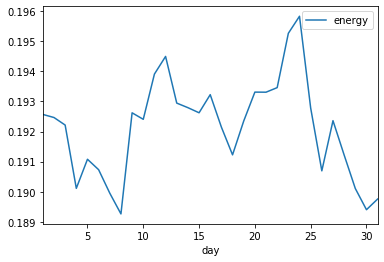

In [0]:
def flatten_to_days(consumption):
    # proper format and not empty
    assert list(consumption.columns)[0] == 'day'
    assert not consumption.empty 
    consumption['day'] = consumption['day'].apply(lambda x: x.day)
    consumption = consumption\
        .groupby(by=['day']).agg(['mean']).reset_index(['day'])
    # here are some f*cking magic with column names
    # coz aggregation return multiindex instead of regular index
    consumption.columns = ['day', 'energy']
    return consumption

# Examples:
#
# retrieve ACORN-F mean day consumption:
# y = flatten_to_days(
#     daily_dataset[daily_dataset['LCLid'].isin(
#         informations_households[informations_households['Acorn']
#                              == 'ACORN-F']['LCLid'])][['day', 'energy_mean']]
#     )
# y.plot(x='day')

## Предварительная обработка данных

### ✔ Добавление рабочих и выходных дней в список праздничных дней

In [0]:
uk_holidays.rename(
    columns={'Bank holidays': 'day'},
    inplace=True
    )
# adding work days and weekdays to uk_holidays
for current_date in pd.date_range(
    daily_dataset.day.min(),
    daily_dataset.day.max(),
    freq='D'):

    uk_holidays = uk_holidays.append(
        {'day': current_date,
         'Type': 'Weekend' if current_date.day in (5, 6) else 'Work Day'
        }, ignore_index=True)

# uk_holidays.to_csv(file_prefix / 'uk_holidays.csv', index=False)

### ✔ Предварительная обработка получасовых значений и сведение их к часовым

Вопрос: стоит ли?

Сильно уменьшится сложность обработки при изъятии данных по LCLid.
Можно будет при загрузке сразу определять тип данных у даты и у показаний счётчика, не будет пустых зачений - то есть предварительно проводится очистка и обработка данных, остаётся только загрузка через read_csv и работа с ними без промежуточных этапов.



```
Результат:
файлы hourly_dataset/block_xxx.csv.zip
формат файла аналогичен halfhourly_dataset/block_xxx.csv.zip, только отсчёты один раз в час

Использует в работе:
halfhourly_dataset/block_xxx.csv.zip
```



In [0]:
# creating progressbar, coz there is much to work
bar = progressbar.ProgressBar(prefix='Processing files: ')
for file in bar(
    os.listdir(file_prefix / 'halfhourly_dataset')
    ):
    # !ls 'drive/My Drive/Colab Notebooks/Skillfactory_game_data'
    # define new file name
    filename = file_prefix / 'hourly_dataset' / file.split('/')[-1]
    z = pd.read_csv(
        file,
        parse_dates=['tstp'],
        infer_datetime_format=True,
        na_values='Null',
        keep_default_na=True,
    )
    z.columns = ['LCLid', 'tstp', 'energy']
    z.fillna(0, inplace=True)
    # np.float16 is too rough even for thousandths
    z['energy'] = z['energy'].astype(np.double, copy=False)
    # now we need to concatenate two halves of an hour
    # roughing them to hours.
    # this place is extremely slow,
    # we need to get rid of this conversion
    z['tstp'] = z['tstp'].apply(
        lambda x: pd.Timestamp(x)\
        .replace(minute=0, second=0)\
        .to_datetime64())
    # grouping, summing and regrouping back one level,
    # converting LCLid column to index.
    z = z \
    .groupby(by=['LCLid', 'tstp'])\
    .agg(np.sum)\
    .reset_index(['tstp'])
    # round energy consumption value to 3 digits, that should be enough
    z.to_csv(filename, float_format='%.3f')


Processing files: 100% (112 of 112) |####| Elapsed Time: 0:33:20 Time:  0:33:20


### ✔ Сведение получасовых данных к часовым, сохранение их в один файл. Без LCLids

Данные сведены из разных файлов в hourly_energy_use.csv

In [0]:
# hourly_energy_use = pd.DataFrame(columns=['tstp', 'energy'])
# files = os.listdir(file_prefix / 'halfhourly_dataset')
# bar = progressbar.ProgressBar(
#     prefix='retrieving files: ')

# for file_name in bar(files):
#     temp = pd.read_csv(
#         file_prefix / 'hourly_dataset' / file_name,
#         parse_dates=['tstp'],
#         na_values='Null')
    
#     temp['energy'] = temp['energy'].fillna('0').astype(np.double)
#     # now we need to concatenate two halves of an hour
#     # roughing them to hours.
#     temp['tstp'] = pd.to_datetime(
#         temp['tstp'].dt.strftime('%Y-%m-%d %H'))
#     # grouping, summing, ungrouping, appending
#     hourly_energy_use = hourly_energy_use.append(
#         temp.groupby(['tstp'])['energy'].sum().reset_index(),
#         ignore_index=False
#     )

# hourly_energy_use = hourly_energy_use\
#     .groupby(['tstp'])['energy']\
#     .sum()\
#     .reset_index()

# hourly_energy_use.to_csv(
#     file_prefix / 'hourly_energy_use.csv',
#     index=False)

hourly_energy_use = pd.read_csv(
    file_prefix / 'hourly_energy_use.csv',
    parse_dates=['tstp'])


### ✔ Сводная таблица часовых потреблений электроэнергии по группам ACORN-x

Необходимо для каждой ACORN-x сделать часовую сводку средней потреблённой электроэнергии и свести в таблицу hour - ACORN-A - ACORN-B - ...

Выполняется один раз. Используются общие функции retrieve_LCLids_hourly_consumption и flatten_to_hours.

Полученный датафрейм сохранён для референса на него в последующих изысканиях как
acorn_hourly_dataset.csv

In [0]:
acorn_groups = list(informations_households['Acorn'].unique())
acorn_hourly_dataset = pd.DataFrame(columns=['hour'])
for acorn in acorn_groups:
    display(f'Retrieving ACORN group: {acorn}...')
    # retrieve list of LCLid for each ACORN-x
    # get dataframe of their hour consumption
    # and calculate mean of it over hours 
    z = flatten_to_hours(
        retrieve_LCLids_hourly_consumption(
            informations_households[informations_households['Acorn']
                             == acorn].index)
    )
    z.columns = ['hour', acorn]
    acorn_hourly_dataset = acorn_hourly_dataset.merge(
        z, on=['hour'], how='outer', copy=False)

acorn_hourly_dataset.to_csv(
    file_prefix / 'acorn_hourly_dataset.csv'
)

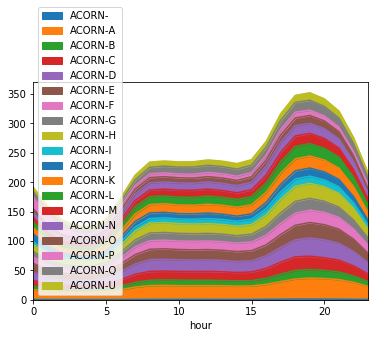

In [0]:
acorn_hourly_dataset.plot.area(x='hour')

## Работа с данными


### запрос всех данных потребителя по его LCLid

Функция пока не используется

In [0]:
LCLid_full_data = namedtuple(
    'LCLid_full_data',
    ['LCLid',
    'Acorn',  # Acorn category group
    'Acorn_grouped',  # common subdivision over Acorn groups
    'stdorToU',  # Standart or TimeOfUse
    'consumption']  # returns DataFrame
)

def retrieve_LCLid_full_data(LCLid):
# запрос всех данных потребителя по его LCLid
    LCLid_series = informations_households.loc[LCLid]
    file = LCLid_series['file']
    hh_ds_block = pd.read_csv(
        file_prefix / 'halfhourly_dataset' / f'{file}.csv.zip',
        parse_dates=['tstp'],
        infer_datetime_format=True,
        na_values='Null',
        keep_default_na=True,
        index_col='LCLid')
    hh_ds_block = hh_ds_block.loc[LCLid]
    hh_ds_block.fillna(0, inplace=True)
    hh_ds_block.columns = ['tstp', 'energy']
    # np.float16 is too rough even for thousandths
    hh_ds_block['energy'] = hh_ds_block['energy'].astype(np.float32, copy=False)

    return LCLid_full_data(
        LCLid=LCLid,
        Acorn=LCLid_series['Acorn'],
        Acorn_grouped=LCLid_series['Acorn_grouped'],
        stdorToU=LCLid_series['stdorToU'],
        consumption=hh_ds_block
    )

z = retrieve_LCLid_full_data('MAC003597')
# z.Acorn
# z.consumption.sample(5)
z.consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24215 entries, MAC003597 to MAC003597
Data columns (total 2 columns):
tstp      24215 non-null datetime64[ns]
energy    24215 non-null float32
dtypes: datetime64[ns](1), float32(1)
memory usage: 472.9+ KB


# Задачи на аналитику

## Очистка данных

Проверка имеющихся групп Acorn

In [0]:
display(informations_households['Acorn'].unique())

array(['ACORN-', 'ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D', 'ACORN-E',
       'ACORN-F', 'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J', 'ACORN-K',
       'ACORN-L', 'ACORN-M', 'ACORN-N', 'ACORN-O', 'ACORN-P', 'ACORN-Q',
       'ACORN-U'], dtype=object)

Присутствует 'ACORN-U(nclassified)' который не принадлежит ни одной ACORN-метрике, и 'ACORN-', который скорее всего неизвестный тип домохозяйства. В любом случае, их нет в acorn_details.csv, поэтому уберём подобные домохозяйства

In [0]:
informations_households = informations_households[
    ~informations_households['Acorn'].isin(['ACORN-U', 'ACORN-'])
]

Рассмотрим данные потребления электроэнергии по дням:

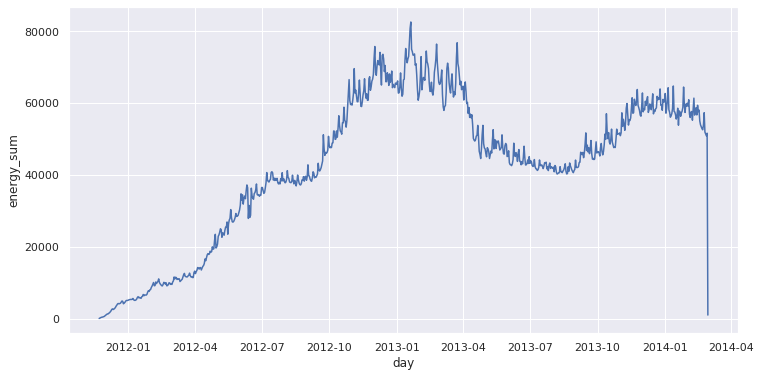

In [0]:
t1 = daily_dataset.groupby('day')['energy_sum'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='energy_sum', data=t1)

Видно, что в самом начале сбора показаний данные о потреблении малы и впоследствии растут; эти малые показания будут давать погрешности в анализе, и по этой причине оставим только те значения, что имеют суммарное значение энергопотребления более 80% от средних показателей за весь период).
Также уберём последний день сбора информации, он явно выделяется из общей группы

In [0]:
z = t1['energy_sum'].mean() * 0.8
t1[t1['energy_sum'] >= z].sort_values(by='energy_sum').head()

,day,energy_sum
220,2012-06-30,34421.895002
216,2012-06-26,34439.920000
219,2012-06-29,34444.351998
195,2012-06-05,34515.655004
215,2012-06-25,34570.670002


In [0]:
start_period_rep = datetime.strptime('2012-07-01', '%Y-%m-%d')
end_period_rep = daily_dataset['day'].max() - timedelta(days=1)
daily_dataset = daily_dataset[
    (daily_dataset['day'] >= start_period_rep) &\
    (daily_dataset['day'] <= end_period_rep)]

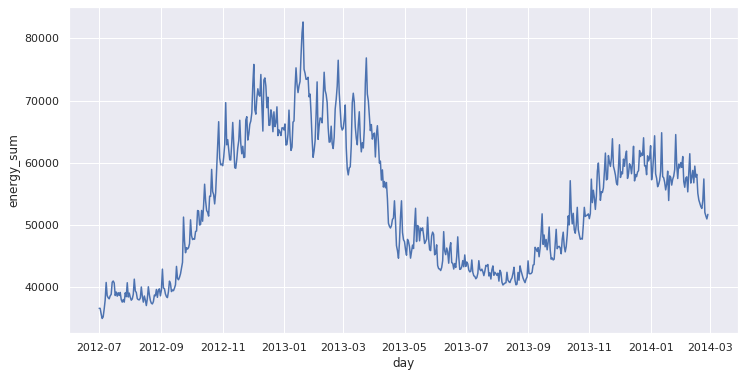

In [0]:
t1 = daily_dataset.groupby('day')['energy_sum'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='energy_sum', data=t1)

## Подготовим дополнительные таблицы

Соберем данные по суммарным потреблениям в домохозяйствах за весь период наблюдений

In [0]:
energy_use_hh = informations_households.merge(
    daily_dataset\
    .groupby(['LCLid'])['energy_sum']\
    .sum()\
    .sort_values(),
     on='LCLid')

Соберем данные по суммарному потреблению за весь наблюдаемый период с периодом в день и с информацией о типе дня недели и погоде

In [0]:
energy_use_d = daily_dataset\
    .groupby(['day'])['energy_sum']\
    .sum()\
    .to_frame()\
    .reset_index()\
    .merge(uk_holidays, 
            on='day',
            how='left')\
    .merge(
        weather_daily_darksky[[
            'time',
            'temperatureMax',
            'temperatureMin',
            'windBearing',
            'windSpeed',
            'icon',
            'visibility']],
           left_on='day',
           right_on='time')
# we don't need 'time' column anymore
energy_use_d = energy_use_d.drop(columns='time')
# add day of week column
energy_use_d['dow'] = energy_use_d.apply(
    lambda x: x['day'].weekday(), axis =  1)

Соберем данные за весь наблюдаемый период с периодом в час с информацией о погоде

In [0]:
energy_use_h = weather_hourly_darksky[[
                            'time',
                            'temperature',
                            'windBearing',
                            'windSpeed',
                            'icon',
                            'visibility']]\
                .merge(hourly_energy_use,
                       left_on='time',
                       right_on = 'tstp')\
                .sort_values(by='energy', 
                            ascending=False)
energy_use_h['hour'] = energy_use_h.apply(
    lambda x: x['time'].hour, axis=1)

Соберем dataframe с описанием групп ACORN
Не совсем понятно, что это такое в результате

In [0]:
acorn_df = acorn_details.columns[3:].to_frame(name='ACORN', index=False)
acorn_categs = ['Age',
                'Geography',
                'House Type',
                'House Size',
                'House Value',
                'Structure',
                'Children in household',
                'Household Size','Economic Activity',
                'Social Grade',
                'Occupation',
                'Behaviours & Lifestyle',
                'Financial Situation',
                'Credit Cards',
                'Interests & Hobbies',
                'Holiday Destination/Type']
for category in acorn_categs:
    acorn_df[category] = acorn_df['ACORN'].apply(get_acorn_info, 
                                                 args=(category,))

## Базовый анализ по домохозяйствам

### Информация о распределении потребления электроэнергии в зависимости от группы ACORN

Рассмотрим общее количество, суммарное потребление энергии и среднее значение потребления энергии домохозяйств в разбивке на группы ACORN, категории комфорта и категории учета электроэнергии

Text(0.5, 1.0, 'Среднее потребление по группам ACORN')

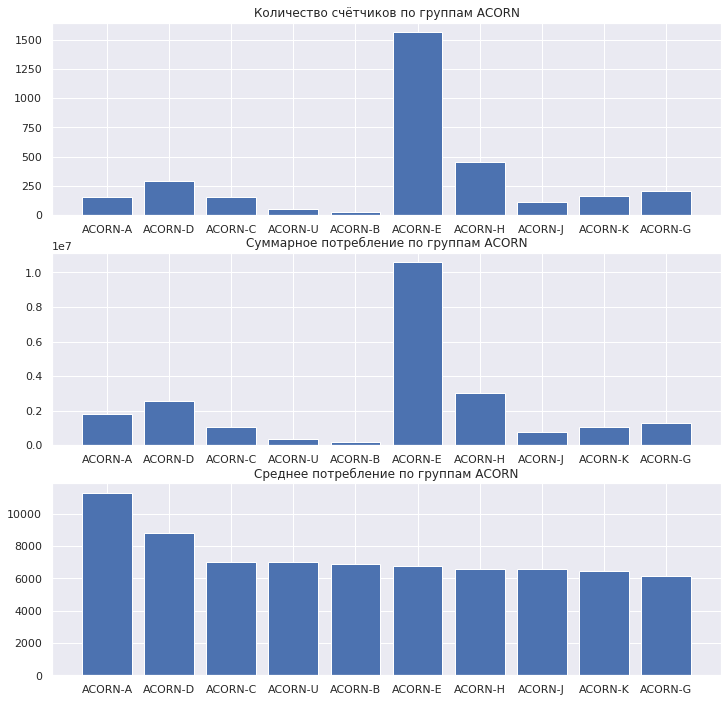

In [19]:
t1 = energy_use_hh.groupby('Acorn')['energy_sum']\
                  .agg({'count_group': 'count',
                        'sum_group': 'sum',
                        'mean_group': 'mean'})\
                  .sort_values(by='mean_group', 
                               ascending=False)\
                  .head(10)\
                  .reset_index()
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
axes[0].bar(x=t1['Acorn'], height=t1['count_group'])
axes[0].set_title('Количество счётчиков по группам ACORN')
axes[1].bar(x=t1['Acorn'], height=t1['sum_group'])
axes[1].set_title('Суммарное потребление по группам ACORN')
axes[2].bar(x=t1['Acorn'], height=t1['mean_group'])
axes[2].set_title('Среднее потребление по группам ACORN')

Выводы по графикам:

* Поскольку количество домохозяйств, принадлежащих к группе ACORN-E максимальное, то и суммарное потребление по ним максимальное
* Но среднее значение говорит нам, что домохозяйства группы ACORN-A потребляют больше электроэнергии

Ниже есть описание различных параметров интересующих групп:

In [41]:
acorn_df[acorn_df['ACORN'].isin(['ACORN-A','ACORN-E'])].T

,0,4
ACORN,ACORN-A,ACORN-E
Age,Aged 65-74,Age 25-34
Geography,England,England
House Type,Detached house,Flat or maisonette
House Size,Number of Beds : 5 plus,Number of Beds : 1
House Value,House Value 1m+,House Value 500k-750k
Structure,Couple family with dependent children,All student households
Children in household,Children at home : 0,Children at home : 1
Household Size,Household size : 5+ persons,Household size : 3-4 persons
Economic Activity,Self-employed,Employee Full-Time


Из описания групп становится понятно, что по среднему показателю потребления представитель такого домохозяства скорее всего уже пожилой человек 65+, имеющий большой, дорогой дом и живущий с детьми. В основном же представителями домохозяйств являются более молодые люди 25-34 лет, имеющие 1 ребенка.

### Информация о распределении потребления энергии в зависимости от типа установленного счетчика

Text(0, 0.5, 'Среднее потребление')

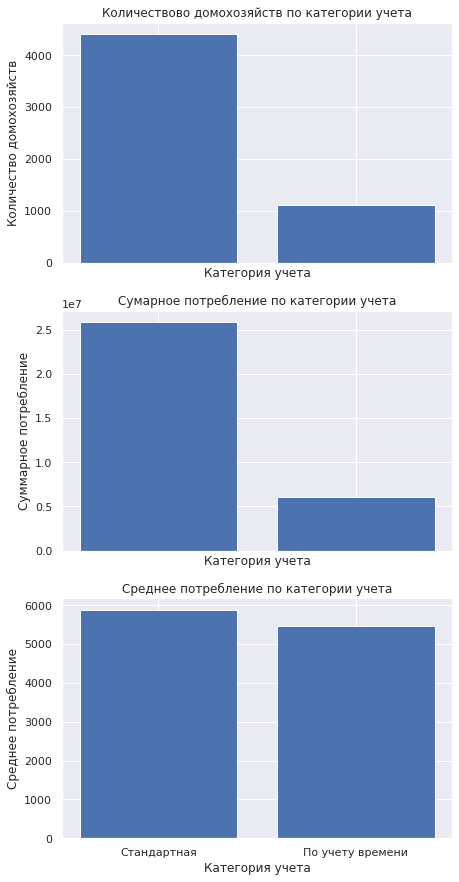

In [54]:
 t1 = energy_use_hh.groupby('stdorToU')['energy_sum']\
                  .agg({'count_group': 'count',
                        'sum_group': 'sum',
                        'mean_group': 'mean'})\
                  .sort_values(by='mean_group', 
                               ascending=False)\
                  .reset_index()
fig, axes = plt.subplots(3, 1, figsize=(7, 15), sharex='col')
axes[0].bar(x=['Стандартная', 'По учету времени'], height=t1['count_group'])
axes[0].set_title('Количествово домохозяйств по категории учета')
axes[0].set_ylabel('Количество домохозяйств')
axes[0].set_xlabel('Категория учета')
axes[1].bar(x=['Стандартная', 'По учету времени'], height=t1['sum_group'])
axes[1].set_title('Сумарное потребление по категории учета')
axes[1].set_xlabel('Категория учета')
axes[1].set_ylabel('Суммарное потребление')
axes[2].bar(x=['Стандартная', 'По учету времени'], height=t1['mean_group'])
axes[2].set_title('Среднее потребление по категории учета')
axes[2].set_xlabel('Категория учета')
axes[2].set_ylabel('Среднее потребление')

Выводы по графикам:

Хотелось бы сделать вывод, что потребление энергии домохозяйством никак не зависит от типа установленного счетчика, но становится понятно, что текущей детализации недостаточно (пользователи с повременным учетом могут потреблять больше в дневное время, а суммарно за день показания будут примерно равны), необходимо сравнение по часам. Суммарные данные дают понять,что самих домохозяйств со стандартным учетом больше

### Информация о распределении потребления энергии в зависимости от категории комфорта

Text(0.5, 1.0, 'Среднее потребление по категории комфорта домовладения')

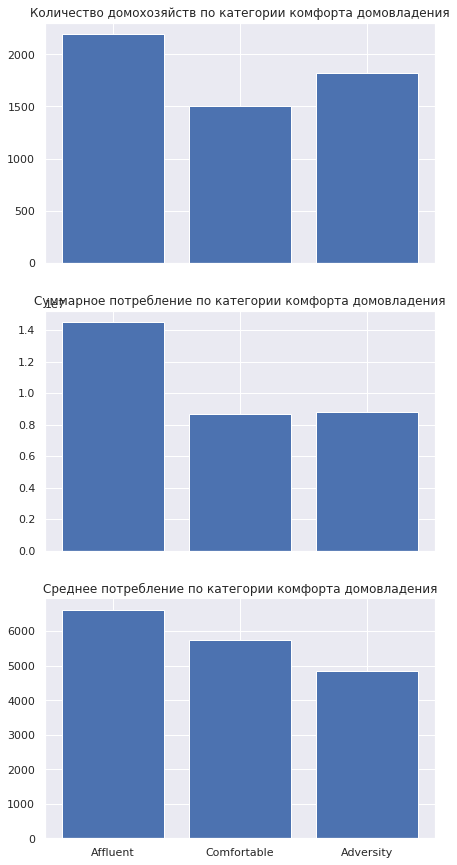

In [55]:
t1 = energy_use_hh.groupby('Acorn_grouped')['energy_sum']\
                  .agg({'count_group':'count',
                        'sum_group':'sum',
                        'mean_group':'mean'})\
                  .sort_values(by='mean_group', 
                               ascending=False)\
                  .reset_index()
fig, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)
axes[0].bar(x=t1['Acorn_grouped'], height=t1['count_group'])
axes[0].set_title('Количество домохозяйств по категории комфорта домовладения')
axes[1].bar(x=t1['Acorn_grouped'], height=t1['sum_group'])
axes[1].set_title('Суммарное потребление по категории комфорта домовладения')
axes[2].bar(x=t1['Acorn_grouped'], height=t1['mean_group'])
axes[2].set_title('Среднее потребление по категории комфорта домовладения')

Выводы по категории комфорта:

Больше всего домохозяйств со средним уровнем комфорта, и по этой же причине они генерируют больше всего потребления электроэнергии.
Среднее потребление в целом не очень сильно отличается между категориями комфорта, но неожиданно максимальное потребление по среднему значению также у домохозяйств с средним уровнем комфорта

Объединим данные по категории ACORN, уровню комфорта и типу счетчика

In [59]:
t1 = energy_use_hh.groupby(
    ['Acorn', 'stdorToU', 'Acorn_grouped'])['energy_sum']\
    .agg({'count_group': 'count',
          'sum_group': 'sum',
          'mean_group': 'mean'})
display(
    t1.sort_values(by='count_group', ascending=False).reset_index().head(2)
    )
display(
    t1.sort_values(by='sum_group', ascending=False).reset_index().head(2)
    )
display(
    t1.sort_values(by='mean_group', ascending=False).reset_index().head(2)
    )

,Acorn,stdorToU,Acorn_grouped,count_group,sum_group,mean_group
0,ACORN-E,Std,Affluent,1228,7.512337e+06,6117.537880
1,ACORN-Q,Std,Adversity,712,3.123371e+06,4386.757552


,Acorn,stdorToU,Acorn_grouped,count_group,sum_group,mean_group
0,ACORN-E,Std,Affluent,1228,7.512337e+06,6117.537880
1,ACORN-Q,Std,Adversity,712,3.123371e+06,4386.757552


,Acorn,stdorToU,Acorn_grouped,count_group,sum_group,mean_group
0,ACORN-A,Std,Affluent,118,1.303798e+06,11049.134449
1,ACORN-A,ToU,Affluent,39,3.475167e+05,8910.685385


Собственно говоря, выводы ровно те же, что и были ранее: вверху списка по потреблённой энергии категория ACORN-E с стандартным типом расчета и средней категорией комфорта (т.к. их кол-во самое большое), а по среднему значению в верх списка попадает ACORN-A - также со стандартным расчетом и средней категорией комфорта

## Анализ потребления по рабочим/праздничным/выходным дням и погодным условиям